In [175]:
from random import randint
from matplotlib import pyplot
from math import log, ceil

In [176]:
matrixes = []
matrixes.append([[-0.231, -0.092],
                 [0.196, 0.800]])
matrixes.append([[0.857, -0.196],
                 [0.348, -0.144]])
matrixes.append([[-0.231, -0.020],
                 [-0.276, 0.768]])

vectors = []
vectors.append((35.723, -68.830))
vectors.append((11.678, 35.113))
vectors.append((-47.715, 45.252))

In [177]:
def apply_random_map(current_x : float, current_y : float) -> tuple[float, float]:
    index = randint(0, len(matrixes) - 1)
    matrix = matrixes[index]
    vector = vectors[index]

    result_x = current_x * matrix[0][0] + current_y * matrix[0][1] + vector[0]
    result_y = current_x * matrix[1][0] + current_y * matrix[1][1] + vector[1]

    return (result_x, result_y)

In [178]:
def create_attractor(start_x : float, start_y : float, iterations_count : int):
    result = []
    current_x, current_y = start_x, start_y
    result.append((current_x, current_y))
    for i in range(iterations_count):
        current_x, current_y = apply_random_map(current_x, current_y)
        result.append((current_x, current_y))
    return result

In [179]:
def count_boxes_with_fixed_size(size : float, x : list[float], y : list[float]):
    start_x = min(x)
    end_x = max(x)
    start_y = min(y)
    end_y = max(y)

    x_steps = ceil((end_x - start_x) / size)
    y_steps = ceil((end_y - start_y) / size)
    boxes = {}
    #[[0 for _ in range(y_steps)] for _ in range(x_steps)]

    for i in range(len(x)):
        current_x, current_y  = x[i], y[i]
        x_index = int((current_x - start_x) / size)
        y_index = int((current_x - start_x) / size)
        boxes[(x_index, y_index)] = 1

    return len(boxes)
    


In [ ]:
def show_results(start_x : float, start_y : float, points_count : int):
    data = create_attractor(start_x, start_y, points_count)
    x, y = zip(*data)
    pyplot.scatter(x, y, s=0.05)
    pyplot.show()
    

    size = 0.5
    last_result = float("Infinity")
    boxes = count_boxes_with_fixed_size(size, x, y)
    new_result = log(boxes) / log(1/size)
    while(last_result - new_result > 0.1):
        size /= 2
        last_result = new_result
        boxes = count_boxes_with_fixed_size(size, x, y)
        new_result = log(boxes) / log(1/size)
        print(f"{boxes} boxes for size of {size} and result is {new_result}")




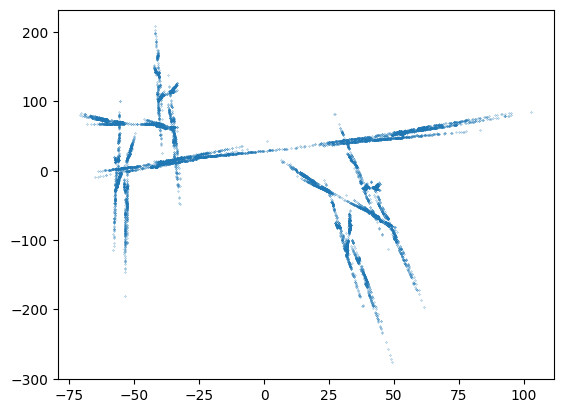

614 boxes for size of 0.25 and result is 4.631047422685089
1102 boxes for size of 0.125 and result is 3.3686361695237195
1900 boxes for size of 0.0625 and result is 2.7229459258045776
3077 boxes for size of 0.03125 and result is 2.317461745666709
4561 boxes for size of 0.015625 and result is 2.0258557424762924
6132 boxes for size of 0.0078125 and result is 1.7974488545226825
7457 boxes for size of 0.00390625 and result is 1.60804745327328
8503 boxes for size of 0.001953125 and result is 1.4504173580624604
9156 boxes for size of 0.0009765625 and result is 1.3160501747555686
9553 boxes for size of 0.00048828125 and result is 1.2019761953883967
9758 boxes for size of 0.000244140625 and result is 1.104364147327169


In [181]:
show_results(10, 10, 10000)